In [34]:
#Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#Hide warning messages in notebook
import warnings
warnings.filterwarnings("ignore")

mouse_drug_data_to_load = "mouse_data.csv"
clinical_trial_data_to_load = "trial_data.csv"
#File to Load
mouse_data_csv = pd.read_csv(mouse_drug_data_to_load)
trial_data_csv = pd.read_csv(clinical_trial_data_to_load)
#Read the Mouse and Drug Data and the Clinical Trial Data
total_data=pd.merge(trial_data_csv, mouse_data_csv, how="left", on=["Mouse ID", "Mouse ID"])
#Display
total_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [35]:
#Store the Mean Tumor Volume Data Grouped by Drug and Timepoint
tumor_mean = total_data.groupby(["Drug", "Timepoint"]).mean()["Tumor Volume (mm3)"]
tumor_mean = pd.DataFrame(tumor_mean)
#Convert DataFrame
tumor_mean=tumor_mean.reset_index()
tumor_mean

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [36]:
#Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_standard_error = total_data.groupby(["Drug", "Timepoint"]).sem()["Tumor Volume (mm3)"]
tumor_standard_error= pd.DataFrame(tumor_standard_error)
#Convert to Data Frame
tumor_standard_error= tumor_standard_error.reset_index()
tumor_standard_error

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
...,...,...,...
95,Zoniferol,25,0.602513
96,Zoniferol,30,0.800043
97,Zoniferol,35,0.881426
98,Zoniferol,40,0.998515


In [37]:
#Minor Data Munging to Re_format the Data Frames
tumor_mean = tumor_mean.reset_index()
tumor_mean_pivot = tumor_mean.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]

tumor_standard_error = tumor_standard_error.reset_index()
tumor_standard_error_pivot = tumor_standard_error.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]

tumor_mean_pivot.head()
                                                                                        

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


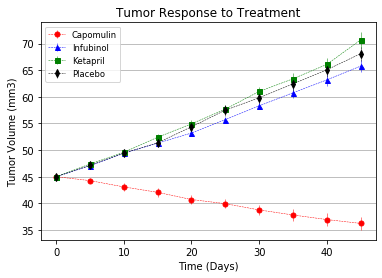

In [38]:
# Generate the Plot (with Error Bars)
plt.errorbar(tumor_mean_pivot.index, tumor_mean_pivot["Capomulin"], yerr=tumor_standard_error_pivot["Capomulin"], color="r", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(tumor_mean_pivot.index, tumor_mean_pivot["Infubinol"], yerr=tumor_standard_error_pivot["Infubinol"], color="b", marker="^", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(tumor_mean_pivot.index, tumor_mean_pivot["Ketapril"], yerr=tumor_standard_error_pivot["Ketapril"], color="g", marker="s", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(tumor_mean_pivot.index, tumor_mean_pivot["Placebo"], yerr=tumor_standard_error_pivot["Placebo"], color="k", marker="d", markersize=5, linestyle="dashed", linewidth=0.50)

plt.title("Tumor Response to Treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time (Days)")
plt.grid(axis='y')
plt.legend(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'],loc="best", fontsize="small", fancybox=True)
plt.savefig("analysis.png")
# Save the Figure


# Show the Figure
plt.show()

In [39]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
meta_mean = total_data.groupby(["Drug", "Timepoint"]).mean()["Metastatic Sites"]

# Convert to DataFrame
meta_mean = pd.DataFrame(meta_mean)
# Preview DataFrame
meta_mean.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [40]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
meta_standard_error = total_data.groupby(["Drug", "Timepoint"]).sem()["Metastatic Sites"]
# Convert to DataFrame
meta_standard_error = pd.DataFrame(meta_standard_error)
# Preview DataFrame
meta_standard_error.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [41]:
# Minor Data Munging to Re-Format the Data Frames
meta_mean = meta_mean.reset_index()
meta_mean_pivot = meta_mean.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]

meta_standard_error = meta_standard_error.reset_index()
meta_standard_error_pivot = meta_standard_error.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]

# Preview that Reformatting worked
meta_mean_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


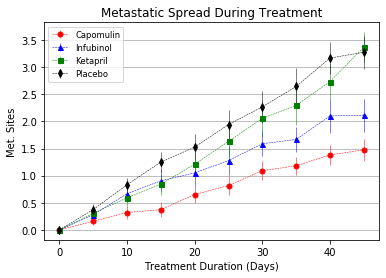

In [43]:
# Generate the Plot (with Error Bars)
plt.errorbar(meta_mean_pivot.index, meta_mean_pivot["Capomulin"], yerr=meta_standard_error_pivot["Capomulin"], color="r", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(meta_mean_pivot.index, meta_mean_pivot["Infubinol"], yerr=meta_standard_error_pivot["Infubinol"], color="b", marker="^", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(meta_mean_pivot.index, meta_mean_pivot["Ketapril"], yerr=meta_standard_error_pivot["Ketapril"], color="g", marker="s", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(meta_mean_pivot.index, meta_mean_pivot["Placebo"], yerr=meta_standard_error_pivot["Placebo"], color="k", marker="d", markersize=5, linestyle="dashed", linewidth=0.50)

plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")
plt.legend(["Capomulin", "Infubinol", "Ketapril", "Placebo"], loc="best", fontsize="small", fancybox=True)
plt.grid(axis="y")
plt.savefig("analysis_meta.png")
plt.show()

In [44]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_count = total_data.groupby(["Drug", "Timepoint"]).count()["Tumor Volume (mm3)"]


# Preview DataFrame
mouse_count = pd.DataFrame({"Mouse Count": mouse_count})

# Convert to DataFrame
mouse_count.head().reset_index()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [45]:
# Minor Data Munging to Re-Format the Data Frames
mouse_count = mouse_count.reset_index()
mouse_count_pivot = mouse_count.pivot(index="Timepoint", columns="Drug")["Mouse Count"]

# Preview the Data Frame
mouse_count_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


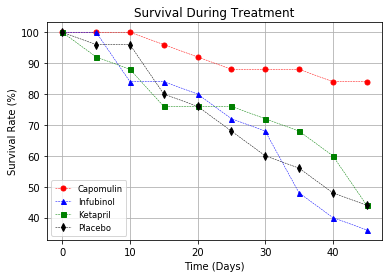

In [46]:
# Generate the Plot (Accounting for percentages)
plt.plot(100*mouse_count_pivot["Capomulin"]/25, color="red", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.plot(100*mouse_count_pivot["Infubinol"]/25, color="b", marker="^", markersize=5, linestyle="dashed", linewidth=0.50)
plt.plot(100*mouse_count_pivot["Ketapril"]/25, color="g", marker="s", markersize=5, linestyle="dashed", linewidth=0.50)
plt.plot(100*mouse_count_pivot["Placebo"]/25, color="k", marker="d", markersize=5, linestyle="dashed", linewidth=0.50)

plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.legend(["Capomulin", "Infubinol", "Ketapril", "Placebo"], loc="best", fontsize="small", fancybox=True)
plt.grid(True)
plt.savefig("analysis_survival.png")
# Show the Figure
plt.show()

In [47]:
# Calculate the percent changes for each drug
percent_change_mean = 100 * (tumor_mean_pivot.iloc[-1]-tumor_mean_pivot.iloc[0])/tumor_mean_pivot.iloc[0]
percent_change_standard_error = 100*(tumor_standard_error_pivot.iloc[-1]-tumor_standard_error_pivot.iloc[0])/tumor_standard_error_pivot.iloc[0]
# Display the data to confirm

percent_change_mean

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

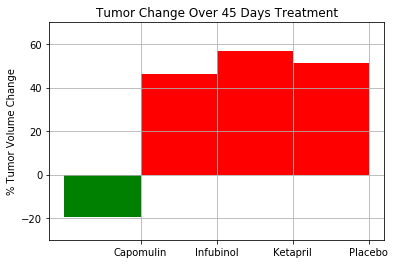

In [49]:
# Store all Relevant Percent Changes into a Tuple
relevant_changes = (percent_change_mean["Capomulin"], 
                    percent_change_mean["Infubinol"], 
                    percent_change_mean["Ketapril"],
                    percent_change_mean["Placebo"])

# Splice the data between passing and failing drugs
fig, ax = plt.subplots()
ind = np.arange(len(relevant_changes))
width=1
relevant_pass = ax.bar(ind[0], relevant_changes[0], width, color="green")
relevant_fail = ax.bar(ind[1:], relevant_changes[1:], width, color="red")
# Use functions to label the percentages of changes
ax.grid(True)
ax.set_title("Tumor Change Over 45 Days Treatment")
ax.set_ylabel("% Tumor Volume Change")
ax.set_xticks(ind + 0.5)
ax.set_xticklabels(("Capomulin", "Infubinol", "Ketapril", "Placebo"))
ax.set_autoscaley_on(False)
ax.set_ylim([-30,70])
plt.savefig("bargraph.png")
# Call functions to implement the function calls

# Save the Figure



